In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [2]:
df=pd.read_csv(r"C:\Users\sarkar\Desktop\final\all about projects\class assignment\churn\data set\customer_churn.csv")

# Final Features 

In [3]:
dff=df[['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Churn']]

In [4]:
dff.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


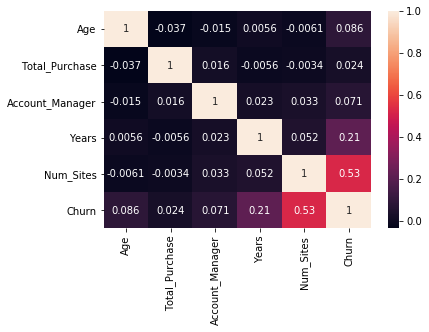

In [5]:
sns.heatmap(df.corr(),annot=True)

# Splitting Data

In [6]:
X=dff.drop("Churn",axis=1)
y=dff["Churn"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model fitting

In [9]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [10]:
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
predtrain=model1.predict(X_train)
predtest=model1.predict(X_test)

# Performance

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

# Function to calculate performance

In [13]:
def performa(y,y_pred):
    confusion=confusion_matrix(y, y_pred)
    accuracy=accuracy_score(y, y_pred)
    precision=precision_score(y, y_pred)
    recall=recall_score(y, y_pred)
    ROC_AUC=roc_auc_score(y, y_pred)
    print("confusion_matrix\n",confusion)
    print("accuracy: ",accuracy)
    print("precision: ",precision)
    print("recall: ",recall)
    print("ROC_AUC: ",ROC_AUC)

# Model 1 without optimisation

### Training score

In [14]:
performa(y_train,predtrain)

confusion_matrix
 [[602   0]
 [  0 118]]
accuracy:  1.0
precision:  1.0
recall:  1.0
ROC_AUC:  1.0


### Test Score

In [15]:
performa(y_test,predtest)

confusion_matrix
 [[142   6]
 [ 16  16]]
accuracy:  0.8777777777777778
precision:  0.7272727272727273
recall:  0.5
ROC_AUC:  0.7297297297297296


### From here we can infer that the model suffers overfitting 

# Model 2 with hyperparameter optimisation

In [16]:
#Using Grid Search
from sklearn.model_selection import GridSearchCV

In [17]:

#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
parameters = {'n_estimators' : (10,30,50,70,90,100)
              , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : ('auto', 'sqrt')
              , 'min_samples_split' : (2,4,6)
              #, 'min_weight_fraction_leaf' : (0.0,0.1,0.2,0.3)
             }

In [18]:
RF_grid  = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)

In [19]:

RF_grid_model = RF_grid.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  4.3min finished


In [20]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
RF_grid_model.best_score_

0.8958333333333334

In [27]:
Model2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
Model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [30]:
predtrain=Model2.predict(X_train)
predtest=Model2.predict(X_test)

In [26]:
best_feat = pd.DataFrame({'Features': X_train.columns,'Importance': RF_Model.feature_importances_})
best_feat.sort_values('Importance', ascending = False)

,Features,Importance
4,Num_Sites,0.676743
3,Years,0.186652
1,Total_Purchase,0.059051
0,Age,0.053466
2,Account_Manager,0.024089


### Training 

In [31]:
performa(y_train,predtrain)

confusion_matrix
 [[588  14]
 [ 56  62]]
accuracy:  0.9027777777777778
precision:  0.8157894736842105
recall:  0.5254237288135594
ROC_AUC:  0.7510839574300354


### Test

In [32]:
performa(y_test,predtest)

confusion_matrix
 [[143   5]
 [ 18  14]]
accuracy:  0.8722222222222222
precision:  0.7368421052631579
recall:  0.4375
ROC_AUC:  0.7018581081081081


In [33]:
arrays = [np.array(['Model1', 'Model1','Model2', 'Model2']),np.array(['Train', 'Test', 'Train', 'Test'])]
accuracy=[1,0.8777777777777778,0.9027777777777778,0.8722222222222222]
precision=[1,0.7272727272727273,0.8157894736842105,0.7368421052631579]
recall=[1,0.5,0.5254237288135594,0.4375]
ROC_AUC=[1,0.7297297297297296,0.7510839574300354,0.7018581081081081]
df_performa=pd.DataFrame({"accuracy":accuracy,
                         "precision":precision,
                         "recall":recall,
                         "ROC_AUC":ROC_AUC,
                         },index=arrays)

In [34]:
df_performa

accuracy  precision    recall   ROC_AUC
Model1 Train  1.000000   1.000000  1.000000  1.000000
       Test   0.877778   0.727273  0.500000  0.729730
Model2 Train  0.902778   0.815789  0.525424  0.751084
       Test   0.872222   0.736842  0.437500  0.701858